<a href="https://colab.research.google.com/github/torresmateo/redes-neuronales/blob/master/Clase_2/Procesamiento_imagenes.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Procesamiento de imágenes

este notebook permite entender y experimentar con la representación de imágenes en la computadora.
Esta es una versión simplificada que no tiene en cuenta diferencias entre diversos formatos y no lidia con características como transparencia o compresión.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter

se define una función de utilidad para transformar una imágen a color a escala de grises

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

se lee una imágen del disco duro

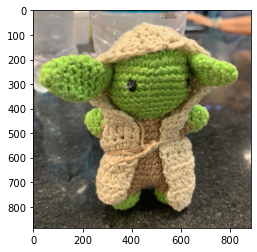

In [13]:
image = plt.imread('data/yoda.jpeg')
plt.imshow(image)

creamos una versión en escale de grises

In [10]:
image_gray = rgb2gray(image).astype(int)

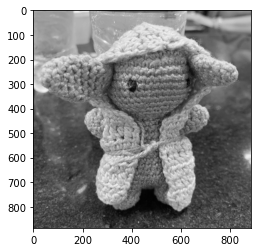

In [11]:
plt.imshow(image_gray, cmap='gray')

In [14]:
image_gray

array([[168, 168, 168, ..., 151, 151, 151],
       [168, 168, 168, ..., 150, 151, 152],
       [166, 166, 167, ..., 148, 149, 149],
       ...,
       [ 70,  49,  47, ...,  75,  63,  62],
       [ 81,  65,  71, ...,  83,  62,  59],
       [ 66,  61,  76, ...,  83,  64,  55]])

In [15]:
image_gray.shape

(886, 886)

la función `image_channel` nos permite extraer canales indviduales de la imagen

In [16]:
def image_channel(img, ax, channel='all'):
    chs = ['r', 'g', 'b']
    t = 'all' if channel == 'all' else channel
    if channel != 'all':
        n_img = np.zeros(img.shape)
        n_img[:,:,chs.index(channel)] = img[:,:,chs.index(channel)]
    else:
        n_img = img
    ax.set(title=t)
    im = ax.imshow(n_img.astype(int))
    ax.grid(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

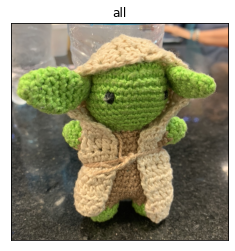

In [17]:
fix, ax = plt.subplots()
image_channel(image, ax)
plt.show()
plt.close('all')

In [18]:
image.shape

(886, 886, 3)

In [19]:
image

array([[[171, 168, 163],
        [171, 168, 163],
        [171, 168, 163],
        ...,
        [150, 149, 167],
        [150, 149, 167],
        [150, 149, 167]],

       [[171, 168, 163],
        [171, 168, 163],
        [171, 168, 163],
        ...,
        [149, 148, 166],
        [150, 149, 167],
        [151, 150, 168]],

       [[168, 167, 163],
        [168, 167, 163],
        [169, 168, 164],
        ...,
        [147, 146, 164],
        [148, 147, 165],
        [148, 147, 165]],

       ...,

       [[ 74,  70,  61],
        [ 53,  49,  40],
        [ 51,  47,  38],
        ...,
        [ 83,  75,  62],
        [ 71,  63,  50],
        [ 70,  62,  49]],

       [[ 87,  80,  74],
        [ 71,  64,  58],
        [ 76,  71,  65],
        ...,
        [ 92,  82,  72],
        [ 71,  61,  51],
        [ 68,  58,  48]],

       [[ 72,  65,  59],
        [ 67,  60,  54],
        [ 81,  76,  70],
        ...,
        [ 92,  82,  72],
        [ 73,  63,  53],
        [ 64,  54,  44]]

la función `swap_channels` nos permite intercambiar canales

In [20]:
def swap_channels(img, ax, a, b, c):
    chs = ['r', 'g', 'b']
    n_img = img.copy()
    n_img[:,:,chs.index('r')] = img[:,:,chs.index(a)]
    n_img[:,:,chs.index('g')] = img[:,:,chs.index(b)]
    n_img[:,:,chs.index('b')] = img[:,:,chs.index(c)]
    im = ax.imshow(n_img.astype(int))
    ax.grid(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

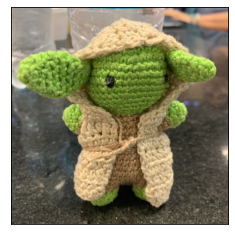

In [21]:
fig, ax = plt.subplots()
swap_channels(image, ax, 'r','g','b')
plt.show()
plt.close('all')

# Filtros simples

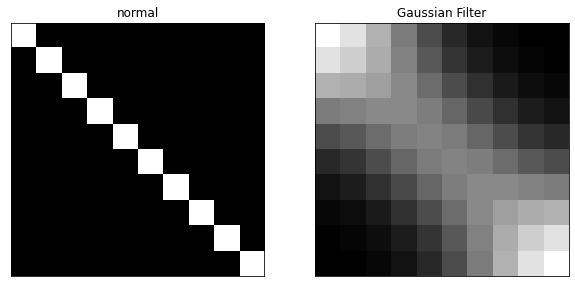

In [22]:
generated_image = np.eye(10) * 255

gaussian = gaussian_filter(generated_image, 2)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs[0]
ax.imshow(generated_image, cmap='gray')
ax.set_title('normal')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax = axs[1]
ax.imshow(gaussian, cmap='gray')
ax.set_title('Gaussian Filter')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.show()
plt.close('all')

In [23]:
generated_image

array([[255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.]])

In [24]:
gaussian[:,:5]

array([[69.7574893 , 61.80131647, 48.50631744, 33.72612078, 20.7712588 ],
       [61.80131647, 56.46249026, 47.02111982, 35.55145545, 24.28502542],
       [48.50631744, 47.02111982, 43.50762828, 37.58002445, 29.69471401],
       [33.72612078, 35.55145545, 37.58002445, 37.65088683, 34.45128041],
       [20.7712588 , 24.28502542, 29.69471401, 34.45128041, 36.21325971],
       [11.33016344, 14.91451735, 21.15628138, 28.25708688, 33.9264126 ],
       [ 5.47342199,  8.2014194 , 13.47689023, 20.63141357, 28.25708688],
       [ 2.34467795,  4.03579486,  7.67655159, 13.47689023, 21.15628138],
       [ 0.90705082,  1.81981014,  4.03579486,  8.2014194 , 14.91451735],
       [ 0.38218301,  0.90705082,  2.34467795,  5.47342199, 11.33016344]])

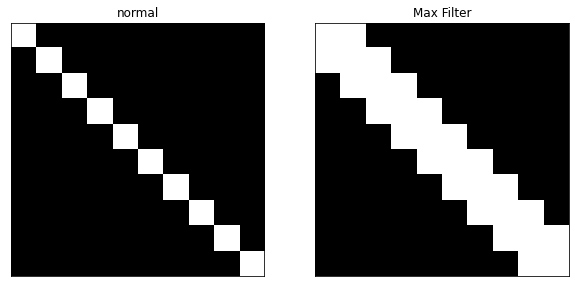

In [25]:
generated_image = np.eye(10) * 255

gaussian = maximum_filter(generated_image, 2)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs[0]
ax.imshow(generated_image, cmap='gray')
ax.set_title('normal')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax = axs[1]
ax.imshow(gaussian, cmap='gray')
ax.set_title('Max Filter')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.show()
plt.close('all')

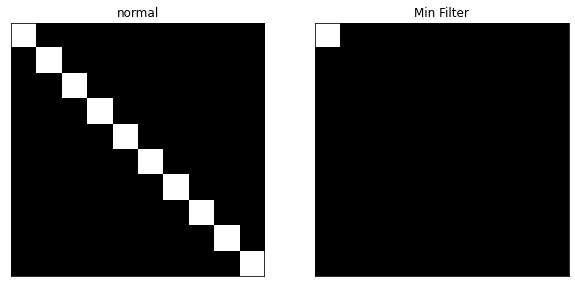

In [26]:
generated_image = np.eye(10) * 255

gaussian = minimum_filter(generated_image, 2)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs[0]
ax.imshow(generated_image, cmap='gray')
ax.set_title('normal')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax = axs[1]
ax.imshow(gaussian, cmap='gray')
ax.set_title('Min Filter')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.show()
plt.close('all')